In [1]:
import cv2
import time
import json
import glob
import seaborn as sn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def plot_confusion_matrix(confusion_matrix,index,columns):
        df_cm = pd.DataFrame(confusion_matrix, index, columns)
        sn.heatmap(df_cm, annot=True)
        #sns.set(font_scale=1.4)
        #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='YlGnBu', fmt='g') # font size
        accuracy = sum(sum(np.eye(array.shape[0], dtype=int)*array))/sum(sum(array))
        plt.title("Accuracy:{}%\nComparison Matrix".format(round(accuracy*100,3)))
        plt.xlabel('prediction' , fontsize=18)
        plt.ylabel('ground truth', fontsize=18)
        plt.show()

In [3]:
Match_result_csv_path = '/root/notebooks/tooth_project/tooth_PBL_detection/Pattern_detection/roots_point_detect/csv_file/PBL_match_result.csv'

In [4]:
Match_result_csv = pd.read_csv(Match_result_csv_path)

In [5]:
Match_result_dropna = Match_result_csv.dropna()
Match_result_dropna.to_csv('./csv_file/Match_result_dropna.csv')

In [6]:
Ground_truth_stage = Match_result_dropna['state']
PBL_predict_stage = Match_result_dropna['PBL_stage']
print(PBL_predict_stage[:1])

194    False
Name: PBL_stage, dtype: object


In [7]:
print(len(Ground_truth_stage) == len(PBL_predict_stage))
print(len(Ground_truth_stage))

True
544


In [8]:
Ground_truth_stage_list = list(Ground_truth_stage) 
PBL_predict_stage_list = list(PBL_predict_stage) 

In [9]:
print(set(Ground_truth_stage_list))
print(set(PBL_predict_stage_list))

{0, 1, 2, 3, -999}
{'3', '1', 'False', '2', '0'}


In [10]:
Ground_truth_stage_list_clean = []
PBL_predict_stage_list_clean = []

count0 = 0
count1 = 0
count2 = 0
count3 = 0
count999 = 0

for G,P in zip(Ground_truth_stage_list,PBL_predict_stage_list):
    Ground_truth_stage_list_clean.append(G)
    if P == 'False':
        PBL_predict_stage_list_clean.append(-999)
    else:
        PBL_predict_stage_list_clean.append(int(P))
    
    if P!='False':
        if G==0 and int(P)==0:
            count0+=1
        elif G==1 and int(P)==1:
            count1+=1
        elif G==2 and int(P)==2:
            count2+=1
        elif G==3 and int(P)==3:
            count3+=1
            
print(count0)
print(count1)
print(count2)
print(count3)

5
69
38
28


In [11]:
print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

{0, 1, 2, 3, -999}
{0, 1, 2, 3, -999}


In [12]:
print(len(Ground_truth_stage_list_clean),len(PBL_predict_stage_list_clean))


544 544


In [13]:
from sklearn.metrics import confusion_matrix
array  = confusion_matrix(Ground_truth_stage_list_clean, PBL_predict_stage_list_clean)

accuracy = sum(sum(np.eye(array.shape[0], dtype=int)*array))/len(Ground_truth_stage_list_clean)
print(round(accuracy*100,3),'%')

print(sum(sum(np.eye(array.shape[0], dtype=int)*array)))
print(sum(np.eye(array.shape[0], dtype=int)*array))

32.169 %
175
[35  5 69 38 28]


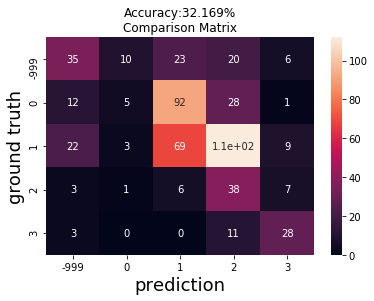

In [14]:
index = ['-999','0','1','2','3']
columns = ['-999','0','1','2','3']

plot_confusion_matrix(array,index,columns)

In [15]:
Ground_truth_stage_list_clean = []
PBL_predict_stage_list_clean = []

count = 0

for G,P in zip(Ground_truth_stage_list,PBL_predict_stage_list):
    if G==1 or G==0:
        Ground_truth_stage_list_clean.append(0)
    else:
        Ground_truth_stage_list_clean.append(G)
    
    
    if P == 'False':
        PBL_predict_stage_list_clean.append(-999)
    elif int(P) ==1 or int(P) ==0:
        PBL_predict_stage_list_clean.append(0)
    else:
        PBL_predict_stage_list_clean.append(int(P))
    
    
    if P!='False':
        if G==2 and int(P)==2:
            count+=1
print(count)

38


In [16]:
print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

{0, -999, 2, 3}
{0, -999, 2, 3}


In [17]:
from sklearn.metrics import confusion_matrix

array  = confusion_matrix(Ground_truth_stage_list_clean, PBL_predict_stage_list_clean)
accuracy = sum(sum(np.eye(array.shape[0], dtype=int)*array))/len(Ground_truth_stage_list_clean)
print(round(accuracy*100,3),'%')

print(sum(sum(np.eye(array.shape[0], dtype=int)*array)))
print(sum(np.eye(array.shape[0], dtype=int)*array))

49.632 %
270
[ 35 169  38  28]


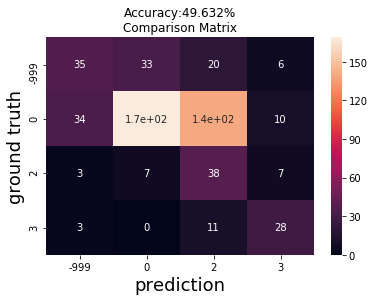

In [18]:
index = ['-999','0','2','3']
columns = ['-999','0','2','3']

plot_confusion_matrix(array,index,columns)

In [19]:
#2D x:stage y:pbl_value


In [20]:
Ground_truth_stage = Match_result_dropna['state']
#Ground_truth_stage = Match_result_dropna['PBL_stage']
PBL_predict_PBL_value = Match_result_dropna['PBL_value']
print(len(Ground_truth_stage))
print(len(PBL_predict_PBL_value))

544
544


In [21]:
# print(set(Ground_truth_stage))
# print(set(PBL_predict_PBL_value))

In [22]:
y_Ground_truth_stage_list_clean = []
x_PBL_predict_PBL_value_list_clean = []

count = 0

for G,P in zip(Ground_truth_stage,PBL_predict_PBL_value):
    if G == -999 or int(P)==0:
        pass
    else:
        y_Ground_truth_stage_list_clean.append(G)
        x_PBL_predict_PBL_value_list_clean.append(int(P))
        count+=1
        if int(P) > 50:
            print(int(P))
print(count)

66
55
80
64
52
102
108
410


In [23]:
print(set(y_Ground_truth_stage_list_clean))
print(set(x_PBL_predict_PBL_value_list_clean))

{0, 1, 2, 3}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 47, 48, 49, 50, 52, 55, 64, 66, 80, 102, 108}


In [24]:
c0 = y_Ground_truth_stage_list_clean.count(0)
c1 = y_Ground_truth_stage_list_clean.count(1)
c2 = y_Ground_truth_stage_list_clean.count(2)
c3 = y_Ground_truth_stage_list_clean.count(3)
cs = c0+c1+c2+c3
print(round((c0*100/cs),3),'%')
print(round((c1*100/cs),3),'%')
print(round((c2*100/cs),3),'%')
print(round((c3*100/cs),3),'%')


30.732 %
47.073 %
12.683 %
9.512 %


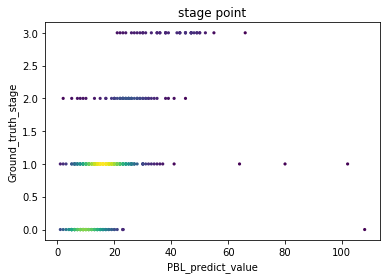

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = x_PBL_predict_PBL_value_list_clean
y = y_Ground_truth_stage_list_clean

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10, edgecolor='')
plt.title("stage point")
plt.xlabel("PBL_predict_value")
plt.ylabel("Ground_truth_stage")
plt.show()

In [26]:
#stage 0,1,2,3
x0,y0 = [],[]
x1,y1 = [],[]
x2,y2 = [],[]
x3,y3 = [],[]
for x,y in zip(x_PBL_predict_PBL_value_list_clean,y_Ground_truth_stage_list_clean):
    if y == 0:
        x0.append(x)
        y0.append(y)
    elif y == 1:
        x1.append(x)
        y1.append(y)
    elif y == 2:
        x2.append(x)
        y2.append(y)
    elif y == 3:
        x3.append(x)
        y3.append(y)
x0count = x0.copy()
y0count = y0.copy()
x1count = x1.copy()
y1count = y1.copy()
x2count = x2.copy()
y2count = y2.copy()
x3count = x3.copy()
y3count = y3.copy()

x0.append(0)
y0.append(1)
x1.append(0)
y1.append(0)
x2.append(0)
y2.append(0)
x3.append(0)
y3.append(0)

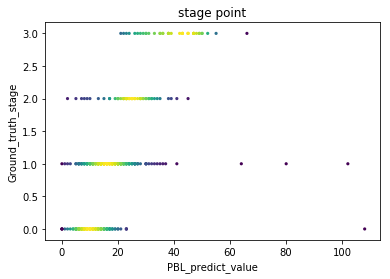

In [27]:
# Generate fake data

# Calculate the point density
xy0 = np.vstack([x0,y0])
z0 = gaussian_kde(xy0)(xy0)
xy1 = np.vstack([x1,y1])
z1 = gaussian_kde(xy1)(xy1)
xy2 = np.vstack([x2,y2])
z2 = gaussian_kde(xy2)(xy2)
xy3 = np.vstack([x3,y3])
z3 = gaussian_kde(xy3)(xy3)

fig, ax = plt.subplots()
ax.scatter(x0, y0, c=z0, s=10, edgecolor='')
ax.scatter(x1, y1, c=z1, s=10, edgecolor='')
ax.scatter(x2, y2, c=z2, s=10, edgecolor='')
ax.scatter(x3, y3, c=z3, s=10, edgecolor='')
plt.title("stage point")
plt.xlabel("PBL_predict_value")
plt.ylabel("Ground_truth_stage")
plt.show()

<Figure size 4608x576 with 0 Axes>

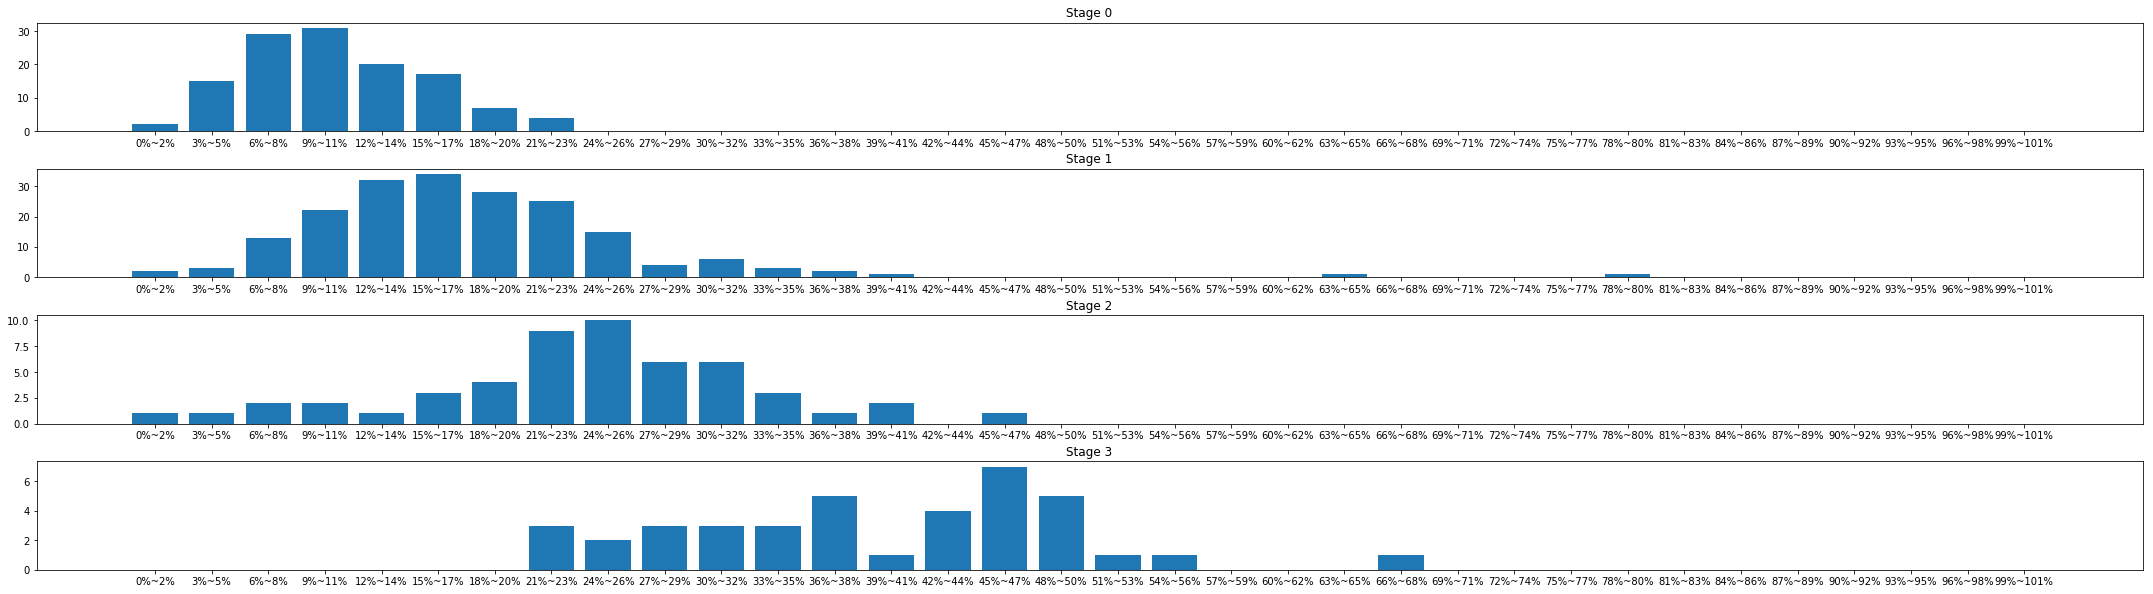

In [28]:
import matplotlib.pyplot as plt


def get_value_count(list_,min_,max_):
    count = 0
    for i in range(min_,max_+1):
        count = list_.count(i)+count
    return count

x = ['{}%~{}%'.format(i*3,(i+1)*3-1) for i in range(34)]
y0count = [ get_value_count(x0count,i*3,(i+1)*3-1) for i in range(34)] 
y1count = [ get_value_count(x1count,i*3,(i+1)*3-1) for i in range(34)] 
y2count = [ get_value_count(x2count,i*3,(i+1)*3-1) for i in range(34)] 
y3count = [ get_value_count(x3count,i*3,(i+1)*3-1) for i in range(34)] 

# fig = plt.figure(figsize=(25,12))
# # Or equivalently, "plt.tight_layout()" 
# #plt.subplot(411)
# fig, axes = plt.subplots(411) 
# plt.title('\n\nstage0')
# plt.bar(x, y0count, label = 'class_a')

# #plt.subplot(412)
# fig, axes = plt.subplots(412) 
# plt.title('\n\nstage1')
# plt.bar(x, y1count, label = 'class_a')

# #plt.subplot(413)
# fig, axes = plt.subplots(413) 
# plt.title('\n\nstage2')
# plt.bar(x, y2count, label = 'class_a')

# #plt.subplot(414)
# fig, axes = plt.subplots(414) 
# plt.title('\n\nstage3')
# plt.bar(x, y3count, label = 'class_a')
# fig.tight_layout() 
# plt.show()

fig = plt.figure(figsize=(64,8))
fig, ax = plt.subplots(4, 1)
ax[0].bar(x, y0count, label = 'class_a')
ax[1].bar(x, y1count, label = 'class_a')
ax[2].bar(x, y2count, label = 'class_a')
ax[3].bar(x, y3count, label = 'class_a')

ax[0].set_title("Stage 0")
ax[1].set_title("Stage 1")
ax[2].set_title("Stage 2")
ax[3].set_title("Stage 3")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=2, 
                    wspace=8, 
                    hspace=0.35)

In [29]:
# def to_mask(img):
#     r = np.array([255, 0, 0])
#     g = np.array([0, 255, 0])
#     b = np.array([0, 0, 255])
#     black = np.array([0, 0, 0])
#     white = np.array([255, 255, 255])
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             if (img[i][j] == r).sum() == 3:
#                 img[i][j] = black
#             elif (img[i][j] == g).sum() == 3:
#                 img[i][j] = white
#             elif (img[i][j] == b).sum() == 3:
#                 img[i][j] = black
#             else:
#                 pass
#     return img

In [30]:
# img_path = '/root/notebooks/tooth_project/tooth_xray_segmention_for_test/unet_multiclass/dataset/train_3class_white/label/NN_120827_095316_BFFF2C.PNG'
# img = cv2.imread(img_path)
# image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# image = cv2.resize(image,(260,260))
# #image = np.where(image < 2, 0,255)
# plt.imshow(image)

In [31]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy
# #import skimage.filter

# img_path = '/root/notebooks/tooth_project/tooth_PBL_detection/Pattern_detection/roots_point_detect/2_roots_unet_mask_components/NN__191111_145307_24202_5.PNG'

# img = scipy.misc.imread(img_path, flatten=1)

# #img = np.where(img < 125,255,0)
# y, x = np.nonzero(img)

# ###turn the center of object of nonzero area to [0,0]
# x = x - np.mean(x)
# y = y - np.mean(y)


# ###水平疊加
# coords = np.vstack([x, y])
# print(coords.shape)

# ###斜方差
# cov = np.cov(coords)
# print(cov.shape)

# evals, evecs = np.linalg.eig(cov)
# print('------------')
# print(evals.shape)
# print(evals)
# print('------------')
# print(evecs.shape)
# print(evecs)
# sort_indices = np.argsort(evals)[::-1]

# print(sort_indices)
# x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
# print('x_v1,y_v1',x_v1,y_v1)
# x_v2, y_v2 = evecs[:, sort_indices[1]]

# scale = 1
# plt.plot([x_v1*-scale*2, x_v1*scale*2],
#          [y_v1*-scale*2, y_v1*scale*2], color='red')
# plt.plot([-1, 1],
#          [-1, 1], color='blue')
# #plt.plot(x, y, 'k.')
# print(x_v1*-scale*2)
# print(x_v1*scale*2)
# plt.axis('equal')
# plt.gca().invert_yaxis()  # Match the image system with origin at top left
# plt.show()


In [32]:
# import numpy as np
# x = np.array([[0, 2], [1, 1], [2, 0]]).T 
# print(x)

# print(np.cov(x))

In [33]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy
# #import skimage.filter

# img_path = '/root/notebooks/tooth_project/tooth_PBL_detection/Pattern_detection/roots_point_detect/2_roots_unet_mask_components/NN__191111_145307_24202_5.PNG'

# img = scipy.misc.imread(img_path, flatten=1)

# #img = np.where(img < 125,255,0)
# y, x = np.nonzero(img)

# ###turn the center of object of nonzero area to [0,0]
# x = x - np.mean(x)
# y = y - np.mean(y)


# ###水平疊加
# coords = np.vstack([x, y])

# ###斜方差
# cov = np.cov(coords)


# evals, evecs = np.linalg.eig(cov)
# sort_indices = np.argsort(evals)[::-1]

# x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
# x_v2, y_v2 = evecs[:, sort_indices[1]]

# scale = 200
# plt.plot([x_v1*-scale*2, x_v1*scale*2],
#          [y_v1*-scale*2, y_v1*scale*2], color='red')
# plt.plot([x_v2*-scale, x_v2*scale],
#           [y_v2*-scale, y_v2*scale], color='blue')
# plt.plot(x, y, 'k.')
# plt.axis('equal')
# plt.gca().invert_yaxis()  # Match the image system with origin at top left
# plt.show()
